# Supervised Learning of Drug Response using CORES from Copy Number Log Ratio

### Import Python source code

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 12:21:38 2018

@author: bbece
"""

from __future__ import division, print_function, unicode_literals
import numpy as np
import os
from IPython.display import display, HTML

from pprint import pprint
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
            
import pandas as pd
import scipy

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math



### Define method to split training and testing set

In [2]:
# TODO: Manipulate test_ratio
def split_train_test(training_set, test_ratio = 0.33):
    row_count = training_set.shape[0]
    shuffled_indices = np.random.permutation(row_count)
    test_set_size = int(test_ratio * row_count)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return training_set.iloc[train_indices], training_set.iloc[test_indices]

### Load training set matrix

In [8]:
labeled_matrix_training_set = pd.read_csv("../mlOutput/coreTrainingSet_7_31_2018_1.csv")
labeled_matrix_training_set.columns.values[0] = "sampleId"
labels = list(range(0,5))


In [4]:
pprint(labeled_matrix_training_set.copy().head())

  sampleId  Gemcitabine  Paclitaxel     SN-38      5-FU  Oxaliplatin  \
0    hM17D     0.637520    0.652945  0.679371  0.822522     0.927028   
1    hM19A     0.744417    0.667870  0.563638  0.839585     0.874489   
2    hM19B     0.736595    0.697379  0.606223  0.909020     0.939280   
3    hM19C     0.672706    0.631027  0.590799  0.641945     0.924407   
4    hM19D     0.585682    0.614227  0.579178  0.583491          NaN   

          1         4         6         8    ...           43        44  \
0 -0.191476 -0.111982 -0.031535  0.194702    ...    -0.180308 -0.388883   
1  0.117598  0.049725  0.292631 -0.521739    ...     0.126315 -0.115778   
2 -0.516071 -0.485236  0.178861 -0.645285    ...     0.096073 -0.113105   
3 -0.494288 -0.585292  0.200625 -0.543859    ...    -0.012848 -0.207628   
4 -0.548347 -0.512629  0.188757 -0.508282    ...     0.105863 -0.005723   

         45        46        47        48        49        50        52  \
0 -0.254426 -0.132726 -0.228261  0.044768

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

preprocessing_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")) # TODO: Temporary fix for scaling
    ,('std_scaler', StandardScaler())
])

processed_training_set = preprocessing_pipeline.fit_transform(labeled_matrix_training_set.copy().drop(["sampleId"], axis=1))


In [19]:
print(final_training_set)

[[-0.23330645  0.49943843  1.55282057 ...,  1.67485858  1.5745206  -0.827832  ]
 [ 1.62726726  0.7561883  -0.68340642 ..., -0.36018446  1.14115059
   1.02234566]
 [ 1.49112882  1.26379274  0.13942341 ..., -0.23270269  1.22492635
   1.15149628]
 ..., 
 [-0.09129981 -0.1330282  -0.24584731 ...,  0.70908473 -0.23126266
   0.83869058]
 [-0.09129981 -0.1330282  -0.24584731 ..., -0.24434973  1.1203276
  -0.24567415]
 [-1.03470437 -1.12981741 -1.33191931 ..., -1.15449277 -0.33156476
  -1.343845  ]]


In [21]:
final_training_set = pd.DataFrame(data=final_training_set, columns = labeled_matrix_training_set.columns[1:])
print(final_training_set.copy().head())

   Gemcitabine  Paclitaxel     SN-38      5-FU  Oxaliplatin         1  \
0    -0.233306    0.499438  1.552821  0.300075     1.348759 -0.065255   
1     1.627267    0.756188 -0.683406  0.507795     0.412063  1.173183   
2     1.491129    1.263793  0.139423  1.353072     1.567209 -1.365884   
3     0.379110    0.122420 -0.158585 -1.898187     1.302047 -1.278601   
4    -1.135565   -0.166577 -0.383144 -2.609772     0.135110 -1.495213   

          4         6         8         9    ...           43        44  \
0  0.405571 -0.439825  0.520059  0.656853    ...    -1.018458 -0.183203   
1  1.086715  0.646296 -1.200589 -1.245120    ...     0.877814  0.523227   
2 -1.166652  0.265109 -1.497303 -1.386605    ...     0.690787  0.530142   
3 -1.588107  0.338029 -1.253714 -1.326183    ...     0.017176  0.285641   
4 -1.282036  0.298265 -1.168269 -1.335386    ...     0.751333  0.807904   

         45        46        47        48        49        50        52  \
0 -0.293263 -0.465442  0.102553 -1.

In [30]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

### Visualize ML results using Linear Regression

0.621215338601
Pearson: (0.86191948110597427, 4.26930774074594e-06)
Spearman: SpearmanrResult(correlation=0.69246646026831782, pvalue=0.0014476080524246128)


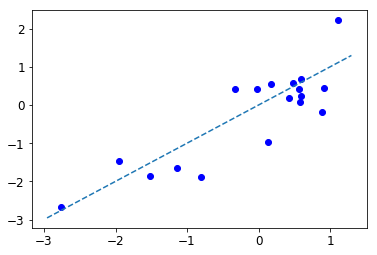

0.695115295755
Pearson: (0.79586457697490487, 7.8110759016263194e-05)
Spearman: SpearmanrResult(correlation=0.77296181630546945, pvalue=0.00016913916228325986)


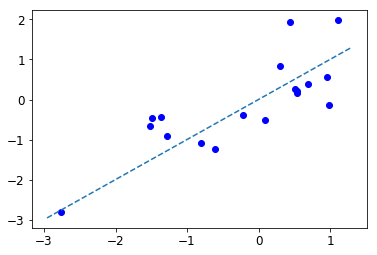

0.447477535568
Pearson: (0.87016001558608203, 2.6812884135605222e-06)
Spearman: SpearmanrResult(correlation=0.81011351909184726, pvalue=4.5945543436253267e-05)


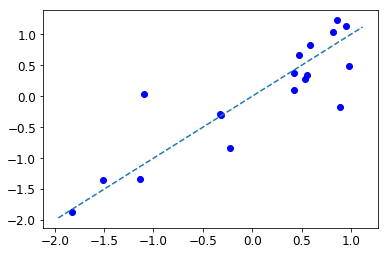

0.506283717194
Pearson: (0.84371500615847339, 1.082604538599799e-05)
Spearman: SpearmanrResult(correlation=0.69865841073271406, pvalue=0.0012575339153336352)


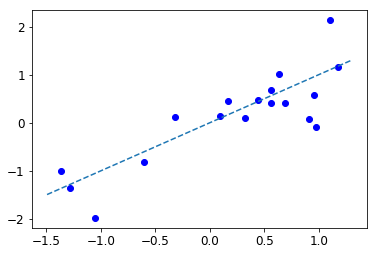

0.57108531031
Pearson: (0.8138460987988364, 3.9694352351175157e-05)
Spearman: SpearmanrResult(correlation=0.64499484004127972, pvalue=0.0038493730388244221)


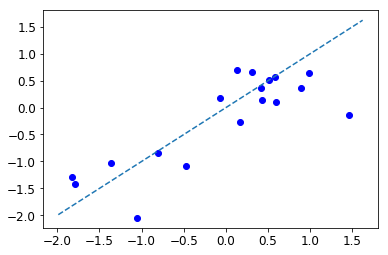

In [33]:
for label in labels:
    # Remove uneeded labels
    selected_training_set = final_training_set.iloc[:, list([label]) + list(range(5,final_training_set.shape[1]))].copy()
    selected_training_set = selected_training_set[np.isfinite(selected_training_set.iloc[:,1])]
    training_set, testing_set = split_train_test(selected_training_set)
    model_data = training_set.copy().drop([training_set.columns[0], training_set.columns[1]], axis = 1)
    model_labels = training_set.iloc[:,1]
    lasso = LinearRegression()
    lasso.fit(model_data, model_labels)
    model_test_data = testing_set.copy().drop([training_set.columns[0], training_set.columns[1]], axis = 1)
    model_test_labels = testing_set.iloc[:,1]
    predictions = lasso.predict(model_test_data)
    mse = mean_squared_error(model_test_labels, predictions)
    rmse = np.sqrt(mse)
    print(rmse)
    r = scipy.stats.pearsonr(model_test_labels, predictions)
    t = scipy.stats.spearmanr(model_test_labels, predictions)
    print("Pearson: " + str(r))
    print("Spearman: " + str(t))
    plt.plot(model_test_labels, predictions, 'bo')
    abline(1,0)
    plt.show()

### Visualize ML results using Random Forest Regressor

0.664774894272
Pearson: (0.85802184035375417, 5.2660545487577923e-06)
Spearman: SpearmanrResult(correlation=0.82043343653250778, pvalue=3.0420805277771525e-05)


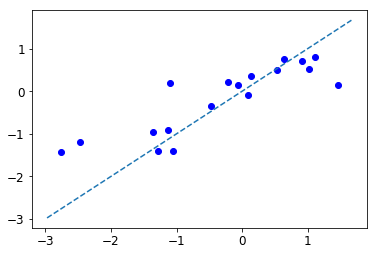

0.432795141868
Pearson: (0.94770182632151667, 2.3867090876931366e-09)
Spearman: SpearmanrResult(correlation=0.95459236326109398, pvalue=7.878415255888488e-10)


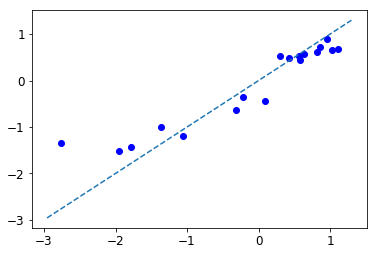

0.490711123086
Pearson: (0.80172906482501394, 6.3105194000194801e-05)
Spearman: SpearmanrResult(correlation=0.83075335397316818, pvalue=1.9612643482449587e-05)


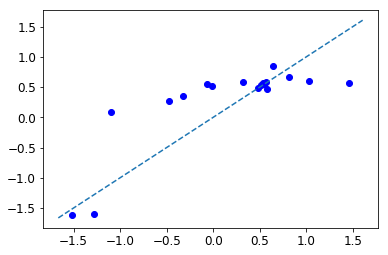

0.492121912947
Pearson: (0.88571390702388886, 1.0165778213523287e-06)
Spearman: SpearmanrResult(correlation=0.80804953560371517, pvalue=4.9748622797470908e-05)


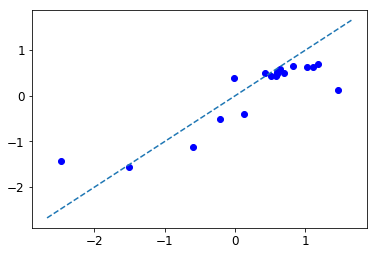

0.495930715111
Pearson: (0.93510399459431792, 1.2888749946490226e-08)
Spearman: SpearmanrResult(correlation=0.88028895768833848, pvalue=1.4473368008429358e-06)


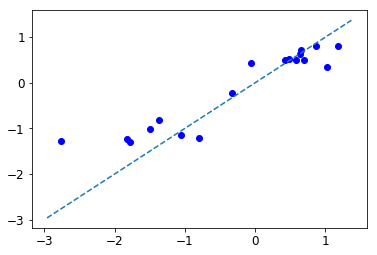

In [32]:
for label in labels:
    # Remove uneeded labels
    selected_training_set = final_training_set.iloc[:, list([label]) + list(range(5,final_training_set.shape[1]))].copy()
    selected_training_set = selected_training_set[np.isfinite(selected_training_set.iloc[:,1])]
    training_set, testing_set = split_train_test(selected_training_set)
    model_data = training_set.copy().drop([training_set.columns[0], training_set.columns[1]], axis = 1)
    model_labels = training_set.iloc[:,1]
    lasso = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    lasso.fit(model_data, model_labels)
    model_test_data = testing_set.copy().drop([training_set.columns[0], training_set.columns[1]], axis = 1)
    model_test_labels = testing_set.iloc[:,1]
    predictions = lasso.predict(model_test_data)
    mse = mean_squared_error(model_test_labels, predictions)
    rmse = np.sqrt(mse)
    print(rmse)
    r = scipy.stats.pearsonr(model_test_labels, predictions)
    t = scipy.stats.spearmanr(model_test_labels, predictions)
    print("Pearson: " + str(r))
    print("Spearman: " + str(t))
    plt.plot(model_test_labels, predictions, 'bo')
    abline(1,0)
    plt.show()
